In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Este notebook pretende ilustrar de una forma didática el concepto de cópula. Para ello, lo ejemplificamos por medio de una cópula Gaussiana.

---

### Generación de series Gaussianas correlacionadas

Primero definimos una serie de parámetros globales del ejemplo

In [15]:
np.random.seed(42)

N = 5000
rho = 0.8  # correlación
cov = [[1, rho],
       [rho, 1]]

Y generamos dos series de normales (de tamaño `N=5000` datos) con matriz de varianzas y covarianzas:
$$
\begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}

In [20]:
Z = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=N)

Z1 = Z[:, 0]
Z2 = Z[:, 1]

print(Z1)
print(Z2)

[ 0.12739874  0.15937604 -0.66193062 ...  2.3394937  -0.13449679
 -0.73094698]
[ 0.76788802  0.21665707 -0.69922235 ...  2.37541653  0.18178462
  0.22773611]


Podemos representar para visualizar ambas series:

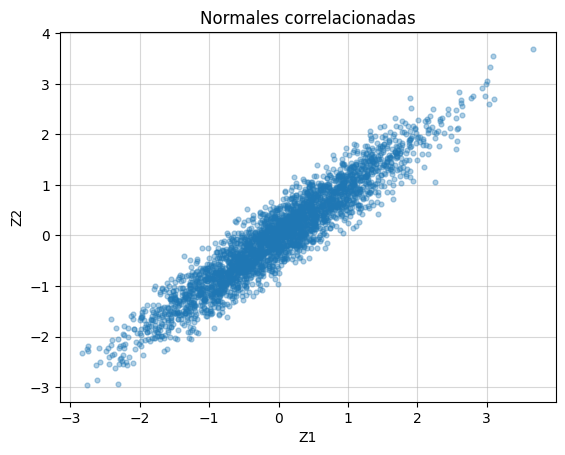

In [13]:
plt.figure()
plt.scatter(Z1, Z2, alpha=0.35, s=12, zorder=3)
plt.title("Normales correlacionadas")
plt.xlabel("Z1")
plt.grid(True, alpha=0.5, zorder=0)
plt.ylabel("Z2")
plt.show()

Podemos también observar los efectos de la correlación representando para distintos `rho`:

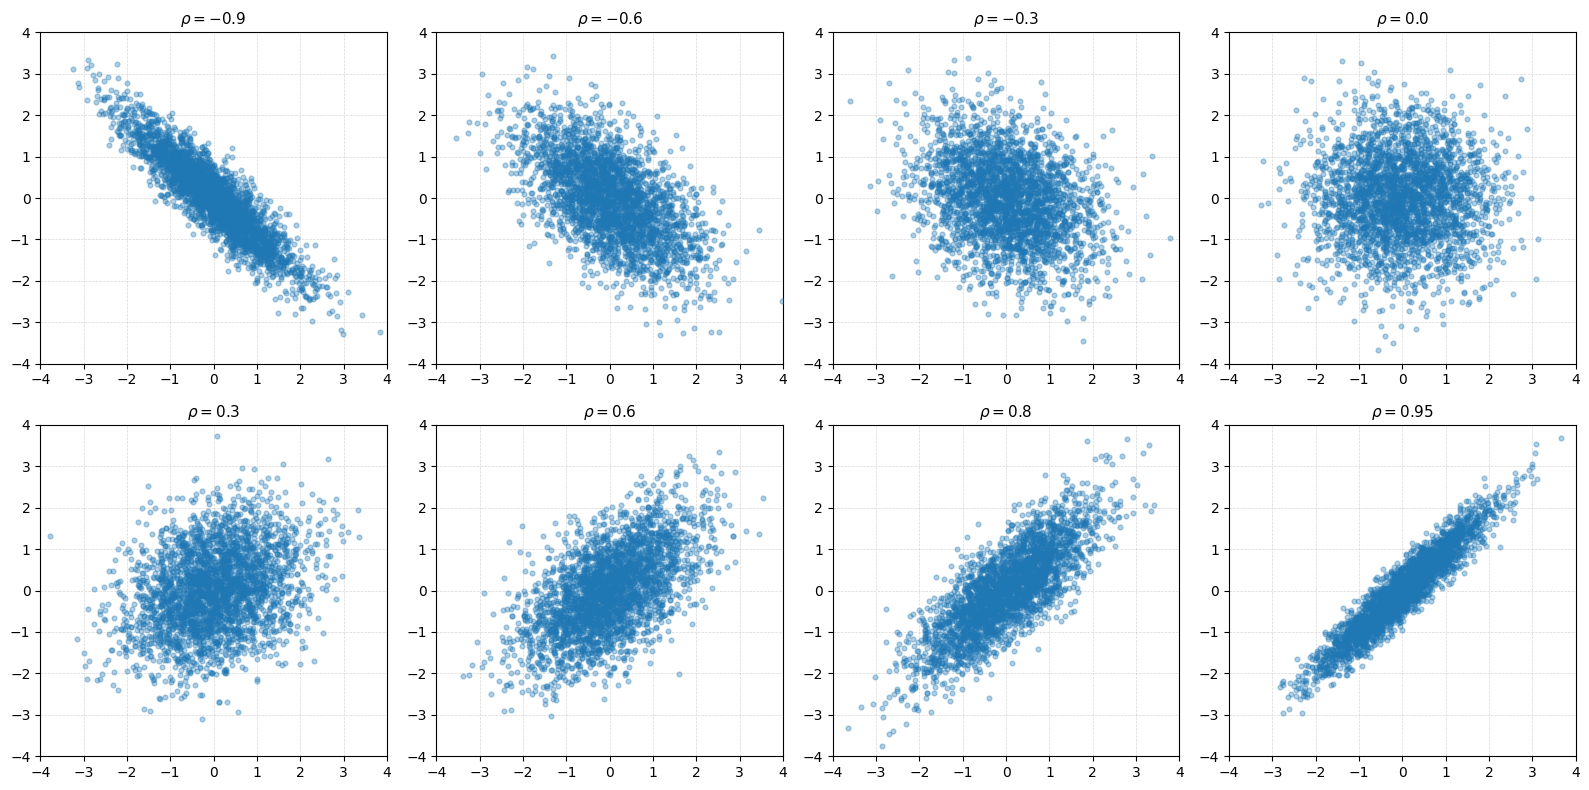

In [11]:
rhos = [-0.9, -0.6, -0.3, 0.0, 0.3, 0.6, 0.8, 0.95]
N = 3000

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, rho in enumerate(rhos):
    
    cov = [[1, rho],
           [rho, 1]]
    
    Z = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=N)
    Z1 = Z[:, 0]
    Z2 = Z[:, 1]
    
    axes[i].set_axisbelow(True)  # grid detrás
    
    axes[i].grid(True, 
                 linestyle="--",
                 linewidth=0.5,
                 alpha=0.5,
                 zorder=0)
    
    axes[i].scatter(Z1, Z2, 
                    alpha=0.35, 
                    s=12, 
                    zorder=3)
    
    axes[i].set_title(f"$\\rho = {rho}$", fontsize=11)
    axes[i].set_xlim(-4, 4)
    axes[i].set_ylim(-4, 4)

plt.tight_layout()
plt.show()

---

### Construcción de la cópula

Ahora aplicamos a las series de datos generados, `Z1` y `Z2` 